In [25]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import numpy
import re

In [27]:
df = pd.read_csv("zomato.csv",encoding='ISO-8859-1')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


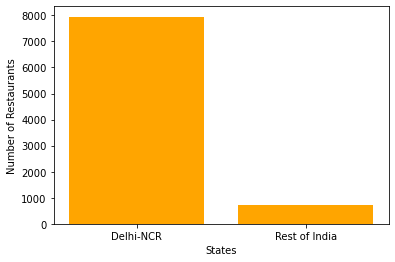

Delhi-NCR= 7947
Others= 705


In [3]:
dataframe = pd.read_csv("Datasets/Zomato.csv",encoding='ISO-8859-1')

df=dataframe.copy()
#summarised all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR.
lst=["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad"]
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
#filtering and keeping all the indian cities in the data frame
#filtered all the indian cities/states
df=df.loc[df.Currency=='Indian Rupees(Rs.)']
#now in the filtered dataframe i have copied all the elements of column 'City', in the filtered dataframe to a numpy array np_City
cities=[]
for i in df['City']:
    cities.append(i)
np_city=np.array(cities)
#initialised two variables corresponding to the restaurants in delhi ncr and rest states
count_delhi=0
other=0
for i in np_city:
    if i=='Delhi-NCR':
        count_delhi+=1
    else:
        other+=1
# print(count_delhi,other)
#plotted a graph between number of restaurants present in delhi ncr and the rest of india.
plt.bar(['Delhi-NCR','Rest of India'],[count_delhi,other],color='orange')
plt.xlabel('States')
plt.ylabel('Number of Restaurants')
plt.show()
print('Delhi-NCR=',count_delhi)
print('Others=',other)

In [4]:
#cleaning all the null values and keeping all the non null values in the dataframe
# print(df)
df=df.loc[df.Cuisines.notnull()]
delhi=[] #created this list to append all the cuisines in delhi according to dataset
for i in df.loc[df['City']=='Delhi-NCR','Cuisines']:
    for j in i.split(','):
        delhi.append(j.strip())
delhi=set(delhi)#creating a set will give me all the unique cusinies present in delhi
#now i have created a list corresponding to the cuisines present in other states of india.
other_states=[]#in this list i have appended all the cuisines from rest parts of the India
for i in df.loc[df['City']!='Delhi-NCR','Cuisines']:
    if i!=np.nan:
        for j in i.split(','):
            other_states.append(j.strip())
other_states=set(other_states)#created a set to get all the unique cuisines in other parts of india
not_in_delhi_ncr_acc_to_dataset=other_states-delhi #subtracting these will give me the cuisines which are present in all 
#the other parts of india except new delhi.

#cuisines, other_states,in_delhi
not_in_delhi_ncr_acc_to_dataset
#according to the dataset these cuisines are not present in delhi.

{'BBQ', 'Cajun', 'German', 'Malwani'}

In [5]:
#apikey=e163afa832578683e99cfb35ef1c0c56
#cityID of Delhi-NCR is 1
#now i will extract the cuisines present in delhi ncr according to the zomato api
params={"user_key":'e163afa832578683e99cfb35ef1c0c56',"city_id":1}
headers={"Accept": "application/json","user-key":"e163afa832578683e99cfb35ef1c0c56"}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=headers,params=params)
data=response.json()
cuisines_from_api_in_delhi=[]
for i in data['cuisines']:
    cuisines_from_api_in_delhi.append(i['cuisine']['cuisine_name'])
cuisines_from_api_in_delhi=set(cuisines_from_api_in_delhi)
#i have created a set of all the uniques cuisines which i found from the zomato api.
# now we have two things ---->   1. cuisines_from_api_in_delhi          2. not_in_delhi_ncr_acc_to_dataset
#now i have printed all those cuisines which are actually in delhi ncr but not mentioned in the dataset.
for i in cuisines_from_api_in_delhi:
    if i in not_in_delhi_ncr_acc_to_dataset:
        print(i)
#following is the list of those cuisines which are not in delhi_ncr according to the dataset. but these are actually available
#in delhi-ncr according to zomato api. it seems like it is just due to incomplete dataset.

BBQ
Malwani


In [6]:
# so this code has been done into two parts, means I divided it into two parts
# 1st part- derived the top 10 cuisines served by maximum number of restaurants in Delhi NCR
# 2nd part- have derived the top 10 cuisines served by maximum number of restaurants in other indian states.
#so first part
df=dataframe.copy()
#now changing the data in accordance with the question
lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
#taking indian cities only 
df=df.loc[df.Currency=='Indian Rupees(Rs.)']


all_cuisines=[]#it indicates all cuisines in delhi ncr only
df=df.loc[df.Cuisines.notnull()]#any cuisinie value should not be null, i have taken care of that
df=df.loc[df['City']=='Delhi-NCR']#i have kept all the city values as Delhi-NCR
for i in df.Cuisines:
    for j in i.split(','):
        all_cuisines.append(j.strip())#saves all the cuisinies in the variable all_cuisines
dic_delhi=dict()# i have created this dictionary because here i will save the no. of restaurants serving a perticular cuisinie in delhi NCR
for i in all_cuisines:
    if i in dic_delhi.keys():
        dic_delhi[i]+=1
    else:
        dic_delhi[i]=1#saved all the values in dictionary
cus1=[]#from the dictionary i have saved the names and no. of restaurants in the variables times1(no. of times the perticular cuisinie occured in the restaurant in delhi ncr)
times1=[]# and cus1 is having the names of all te cuisines. 
#i have created these tw variables because i am planning to create a numpy array of them and use the numpy functions for sort them.

for i in dic_delhi.keys():
    cus1.append(i)
    times1.append(dic_delhi[i])
#i have apended all the dictionary values to the two lists.
np_cus1=np.array(cus1)#created a numpy array out of those two lists
np_times1=np.array(times1)
np_cus1=np_cus1[np.argsort(np_times1)][::-1]#sorted
np_times1=np.sort(np_times1)[::-1]#sorted
print("The following data is corresponding to the restaurants in Delhi-NCR")
for i in range(10):#printed
    print(np_cus1[i], ": ", np_times1[i])

#=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
print()
#this is the second part of the code. i just copied it from above and made some changes accordingly.
#created a new copy of the dataframe because i dont want to mess with is previous changed dataset.
df=dataframe.copy()

lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
df=df.loc[df.Currency=='Indian Rupees(Rs.)']
#did the similar thing that i did in the first part.
all_cuisines=[]
df=df.loc[df['City']!='Delhi-NCR']
for i in df.Cuisines:
    for j in i.split(','):
        all_cuisines.append(j.strip())
dic_other=dict()
for i in all_cuisines:
    if i in dic_other.keys():
        dic_other[i]+=1
    else:
        dic_other[i]=1
cus2=[]
times2=[]
for i in dic_other.keys():
    cus2.append(i)
    times2.append(dic_other[i])
np_cus2=np.array(cus2)
np_times2=np.array(times2)
np_cus2=np_cus2[np.argsort(np_times2)][::-1]
np_times2=np.sort(np_times2)[::-1]
print("The following data is corresponding to those restaurants which are not in Delhi-NCR")
for i in range(10):

    print(np_cus2[i], ": ", np_times2[i])

The following data is corresponding to the restaurants in Delhi-NCR
North Indian :  3597
Chinese :  2448
Fast Food :  1866
Mughlai :  933
Bakery :  697
South Indian :  569
Continental :  547
Desserts :  542
Street Food :  538
Italian :  535

The following data is corresponding to those restaurants which are not in Delhi-NCR
North Indian :  349
Chinese :  242
Continental :  177
Italian :  147
Cafe :  136
Fast Food :  97
South Indian :  62
Mughlai :  59
Desserts :  55
Mexican :  50


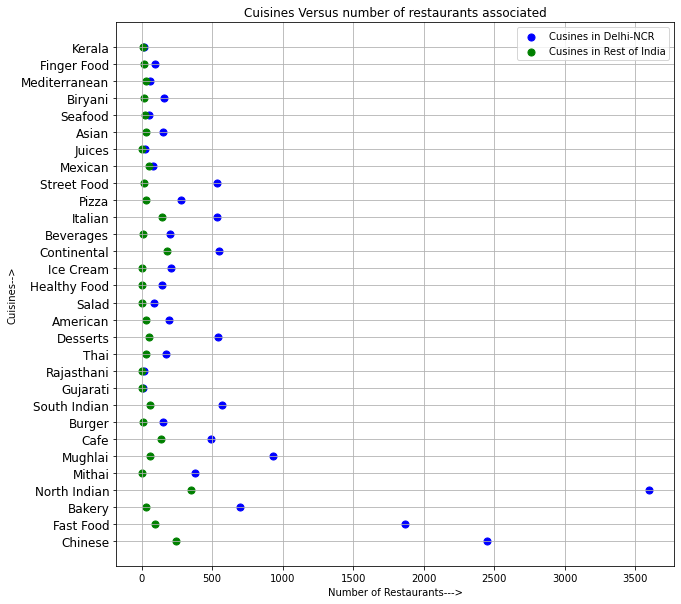

In [7]:
cuisine=[]
in_delhi=[] #containing the number of restaurants with particular cuisine in delhi
in_others=[] #containing the number of restaurants with particular cuisine in rest of indian states
for i in dic_delhi.keys():
    if i in dic_other:
        cuisine.append(i)
        in_delhi.append(dic_delhi[i])
        in_others.append(dic_other[i])
plt.figure(figsize=(10,10))
plt.scatter(in_delhi[0:30],cuisine[0:30],c='blue',s=50)
plt.scatter(in_others[0:30],cuisine[0:30],c='green',s=50)
plt.yticks(size=12)
plt.grid()
plt.xlabel('Number of Restaurants--->')
plt.ylabel("Cuisines-->")
plt.title('Cuisines Versus number of restaurants associated')
plt.legend(['Cusines in Delhi-NCR', 'Cusines in Rest of India'])
plt.show()

# # Detailed Analysis

From the above graph we can infer that "North Indian" cusinie is the most popular among restaurants of Delhi_NCR as well as other states. Here, I have plotted only those 30 important cusinies which are common in both Delhi-NCR and other states. There are some cusinies present in other states and are not present in any restaurant of Delhi-NCR. After North Indian cuisine we have chinese cusinie with 2448 restaurants in Delhi-NCR and 242 in other states of india. After these two we have fast food with 1866 restaurants in Delhi_NCR and 97 in other states(a huge difference). After this we have Mughlai cusinie in Delhi-NCR with 933 restaurants and 59 in the states other than Delhi-NCR. and there are many more cusinies as show in the graph.

## Question 2

#  aggregate user rating varies with number of votes


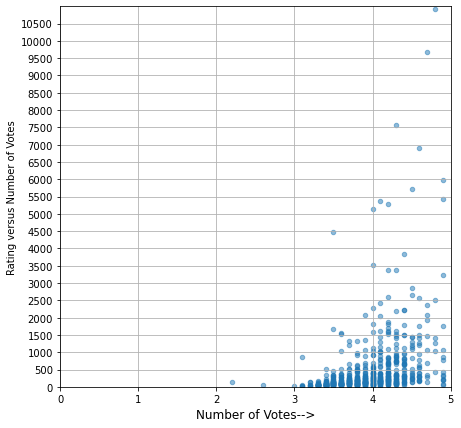

In [8]:
##Here i just plotted the graph and explanation below
plt.figure(figsize=(7,7))
plt.scatter(df['Aggregate rating'],df['Votes'], s=20,alpha=0.5)
plt.yticks(np.arange(0,11000,500))
plt.axis([0,5,0,11000])
plt.xlabel("Number of Votes-->", size=12)
plt.ylabel("Rating versus Number of Votes")
plt.grid()
plt.show()

Clearly as the number of votes increases the chances of getting higher ratings also increases. It is clear from the graph that any restaurants with more than 5000 votes get ratings between 4 and 5. when the votes are less than 2000, there is a diversity of ratings, which varies from 2 to 5. So for a restaurant to have a probability of getting higher aggregate rating, it should have more than 5000 votes. Also there are many restaurants having votes between between 1000 and 2000 with very good ratings, that is between 4 and 5.

# aggregate user rating varies with number of cuisines served

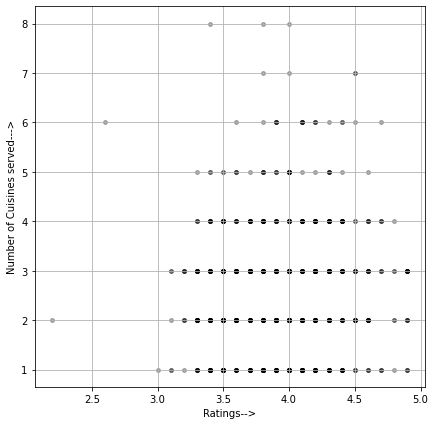

Number of cuisines served=  2 number of restaurants serving given number of cuisies=  207
Number of cuisines served=  1 number of restaurants serving given number of cuisies=  158
Number of cuisines served=  3 number of restaurants serving given number of cuisies=  180
Number of cuisines served=  4 number of restaurants serving given number of cuisies=  102
Number of cuisines served=  5 number of restaurants serving given number of cuisies=  31
Number of cuisines served=  6 number of restaurants serving given number of cuisies=  20
Number of cuisines served=  7 number of restaurants serving given number of cuisies=  4
Number of cuisines served=  8 number of restaurants serving given number of cuisies=  3


In [9]:
df=df.loc[df.Cuisines.notnull()]
cuisines=[len(i.split(',')) for i in df.Cuisines]
rating=[i for i in df['Aggregate rating']]
plt.figure(figsize=(7,7))
plt.scatter(rating,cuisines,c='black',s=15,alpha=0.3)
plt.xlabel('Ratings-->')
plt.ylabel('Number of Cuisines served--->')
plt.grid()
plt.show()
dic=dict()
for i in cuisines:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
for i in dic.keys():
    print("Number of cuisines served= ", i, "number of restaurants serving given number of cuisies= ", dic[i])


From the graph itself, it is clear that when the number of cuisines provided increases from 3 to 8, generally the rating seems to converge between 3 and 4. restaurants providing more number of cuisines are not much likely to get higher ratings, specially when the number of cuisines provided exceeds 6. while if the restaurants provide less number of cuisines, for example 1 or 2 cuisines, they are more likely to get higher ratings. Infact many restaurants in india are providing 2 cuisines. there is a very less number of restaurants providing 8 cuisines. it seems like when a restaurant provides too many cuisines, its focus on the quality of food offered diverges. while restaurants providing less cuisines focus on the quality of food to get good aggregate ratings.

# aggregate user rating varies with average cost of the restaurant

In [10]:
df=dataframe.copy()
plt.figure(figsize=(7, 7))


plt.subplots(0, 1)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange')
plt.grid()
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()


plt.subplots(0, 2)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange', alpha=0.3)
plt.grid()
plt.axis([0, 5, 0, 9000])
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 504x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>


In the first subplot we can see that when the average cost goes higher than 1 lakh the rating is generally between 4 and 5, and ofcourse it sholud be like that only, because when the average cost is too high itself, the food quality should also be at its peak.This subplot dosen't give us much details about the variation of rating with the average cost. The second subplot is made by narrowing the range of average cost for two.As the average cost goes in between 2000, to 6000, it seems like the food is not worth the money because in that case the average rating is generally between 3 and 4. whereas when the average cost is between 1000 to 2000, the rating varies from 3 to 4.5 mostly. But for the higher price ranges the rating is between 3 and 4.

# the aggregate user rating varies with restaurants serving some specific cuisines.

In [ ]:
df=dataframe.copy()
df=df.loc[df.Cuisines.notnull()]
cuisines=[]
for i in df.Cuisines:
    for j in i.split(','):
        cuisines.append(j)
dic=dict()
for i in cuisines:
    if i.strip() in dic.keys():
        dic[i.strip()]+=1
    else:
        dic[i.strip()]=1
cus=np.array([i for i in dic.keys()])
freq=np.array([i for i in dic.values()])

cus=cus[np.argsort(freq)][::-1]
freq=freq[np.argsort(freq)][::-1]
popular_cuisines=cus[:5]

plt.figure(figsize=(15,10))
for i in popular_cuisines:
    rating=[]
    for j,k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black',bins=[0,1,2,3,4,5])
    plt.xlabel("Rating-->")
    plt.ylabel("Number of Restaurants-->")
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')

plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()
popular_cuisines


From the above histrogram plot, it is clear that North indian cuisinie is the best rated among all the cuisinies in all the aggregate ranges. After it comes the chinese cuisinie, it is rated between 3 to 4 maximum number of times. Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times.after these comes mughlai and italian cuisines.it seems like people like the italian cuisinie very much because it has a considerable rating between 3 to 4 and 4 to 5 also.

# Weighted Restaurant Rating

In [30]:
df=dataframe.copy()
np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_locality=np.array([i for i in df['Locality']])
dic=dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]
        #here I have just applied the complete formula to calculate Weighted restaurant rating  in each locality
        #here 'i' is the locality name and this leanthy term is the formula for calculating  WRR.
        #sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0] here [0] at the last is used because the result i will get from sum((np_votes*np_rating)[np.argwhere(np_locality==i)]) is an array with one number. thats why i have indexed it to get that number.
        #same is the case with sum(np_votes[np.argwhere(np_locality==i)])[0]
np_local=np.array([i for i in dic.keys()])#numpy array of locality
np_wrr=np.array([i for i in dic.values()])#weighted restaurant rating
np_local=np_local[np.argsort(np_wrr)][::-1]#arranged in descending order
np_wrr=np.sort(np_wrr)[::-1]#arranged in desceding order
for i in range(len(np_wrr)):
    print(np_local[i], "----->", np_wrr[i])

Beak Street, Soho -----> 4.9
Fort Street -----> 4.9
Barwa Towers, Al Sadd -----> 4.9
Sofitel Philippine Plaza Manila, Pasay City -----> 4.9
Aminabad -----> 4.9
Bebek -----> 4.9
Pondok Aren -----> 4.9
Kenwood -----> 4.9
Cengkareng -----> 4.9
Deira City Centre Area -----> 4.9
New Tampa -----> 4.9
Paia -----> 4.9
Venetian Village, Al Maqtaa -----> 4.9
Penjaringan -----> 4.9
Taman Impian Jaya Ancol, Ancol -----> 4.9
Bishopsgate, City Of London -----> 4.9
Marshalltown -----> 4.9
Lexington Street, Soho -----> 4.9
West Park -----> 4.9
Old Dutch Hospital, Fort -----> 4.9
Caddebostan -----> 4.9
City and Suburban -----> 4.9
DIFC -----> 4.9
Gíçvea -----> 4.9
Nassima Royal Hotel, Trade Centre Area -----> 4.9
Hotel Clarks Amer, Malviya Nagar -----> 4.9
Windermere -----> 4.9
The Milk District -----> 4.9
Setor De Clubes Esportivos Sul -----> 4.9
Friends Colony -----> 4.886916367367881
Powai -----> 4.841868613138686
Kirlampudi Layout -----> 4.820161290322581
Sanford -----> 4.8
Galeria River, Copacaban

In [29]:
df=df.loc[df.Currency=='Indian Rupees(Rs.)']
np_locality=np.array([i for i in df['Locality']])
for i in set(np_locality):
    df = df[df.Locality == i]
    wr = (df["Votes"]*df["Aggregate rating"])/sum(df["Votes"])
    print(wr)

8483    1.768
8484    0.600
8485    0.000
dtype: float64
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64

# Following are the top 10 localities with more weighted restaurant rating

1-Marshalltown
2-Barwa Towers, Al Sadd
3-West Park
4-New Tampa
5-The Milk District
6-Taman Impian Jaya Ancol, Ancol
7-DIFC
8-City and Suburban
9-Pondok Aren
10-Cengkareng

# Question 3

# Top 15 restaurants having maximum outlets

In [ ]:
df=dataframe.copy()
dic=dict()
#created a dictionary which will contain all frequenies ofn restaurants
for i in df['Restaurant Name']:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1

#instead of working with the dictionary, i appended all the dictionary values and keys to numpy arrays
np_names=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])
np_names=np_names[np.argsort(np_freq)][::-1]# sorted in descending order
np_freq=np_freq[np.argsort(np_freq)][::-1]#sorted in descending order
#graph plotting
plt.figure(figsize=(8,8))
plt.barh(np_names[0:15],np_freq[0:15], color='orange')
plt.grid()
plt.xlabel("Number of outlets--->")
plt.ylabel("Restaurants")
plt.title("Top 15 restaurants having maximum outlets")
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=14)
plt.show()

# The histogram of aggregate rating of restaurant

In [ ]:
x=df['Aggregate rating'].dropna()
plt.figure(figsize=(9,7))
plt.xticks(range(6))
plt.xlabel("Aggregate Rating-->")
plt.ylabel("Number of Restaurants-->")
plt.hist(x, color='red', edgecolor='black', bins=range(6))
#fixed the bins exactly to align with the xticks.
plt.grid()
plt.show()

# Bar graph of top 10 restaurants in the data with the highest number of votes

In [ ]:
np_restaurants=np.array([i for i in df['Restaurant Name']])
np_votes=np.array([i for i in df["Votes"]])
#i have created two numpy arrays of votes and restaurants from the dataframe
dic=dict()
#i have summed up the number of votes of different restaurants in the dctionary
for i in range(len(np_restaurants)):
    if np_restaurants[i] in dic.keys():
        dic[np_restaurants[i]]+=np_votes[i]
    else:
        dic[np_restaurants[i]]=np_votes[i]
#when the dictionary is created, i have appended all the values and the keys of the dictionary in the numpy arrays.
#because it will then be easier to plot them and even arrange them in ascending order
np_r=np.array([i for i in dic.keys()])
np_v=np.array([i for i in dic.values()])
np_r=np_r[np.argsort(np_v)][::-1]#sorted
np_v=np_v[np.argsort(np_v)][::-1]#sorted
#graph plotting
plt.figure(figsize=(8,8))
plt.barh(np_r[0:10],np_v[0:10], color='rbg')
plt.xlabel('Restaurants-->')
plt.ylabel('Total number of votes-->')
plt.title("Top 10 restaurants with highest number of votes")
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

# The pie graph of top 10 cuisines present in restaurants in the USA


In [ ]:
#top cuisinies will be those which are served by maximum number of restaurants.
df=dataframe.copy()
#copied and filtered the data according to the question
df=df.loc[df['Cuisines'].notnull()]#filtering and keeping all the non null values.
df=df.loc[df['Currency']=='Dollar($)']# to filter the country, we can use their currency, that is US dollar
cu=[]#appended all the cuisinies available in this list and their frequency is stored as dictionary values.
for i in df.Cuisines:
    for j in i.split(','):
        cu.append(j.strip())
dic=dict()
for i in cu:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
#hence dictionary is created
#appended the values and keys of the dictionary in the numpy arrays for the easiness of sorting and plotting later.
np_cuisines=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])
np_cuisines=np_cuisines[np.argsort(np_freq)][::-1]#sorted
np_freq=np.sort(np_freq)[::-1]#sorted
#pie chat plotting
plt.pie(np_freq[0:10], labels=np_cuisines[0:10], radius=2.5, autopct='%.2f')
plt.show()

In [11]:
#in this question i have made 2 graphs the first one is between cities and number of restaurants and the second graph is
#the same except its x coordinates are in the range 0 to 50 for a clear visualisation of the first graph.
#i.e. the second graph is the enlarged version of the first graph.
#both the graphs are same except the variation in the range of x axis.
df=dataframe.copy()
df=df.loc[df.Currency=='Indian Rupees(Rs.)']# For indian restaurants only
np_rating=np.array([i for i in df['Aggregate rating']])#created a numpy array with aggregate rating of each restaurant
np_votes=np.array([i for i in df['Votes']])#numpy array of votes of each restaurant
np_city=np.array([i for i in df['City']])#numpy array of cities column from the data frame
dic=dict()
for i in set(np_city):
    if sum(np_votes[np.argwhere(np_city==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_city==i)])[0]/sum(np_votes[np.argwhere(np_city==i)])[0]
dic1=dict()#this dictionary contains the number of restaurants present in each city. i.e. how many times the cities have occured in the dataframe.

for i in np_city:
    if i in dic1.keys():
        dic1[i]+=1
    else:
        dic1[i]=1
#hence, dictionary created
size=[]
for i in dic:
    size.append(dic[i])
        
#plotting the first graph
plt.subplots(0, 2)
plt.figure(figsize=(10, 12))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='red')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.grid()
plt.show()

print(dic1)
#plotting the same graph with zoomed x axis. to analyse it properly
plt.subplots(0, 1)
plt.figure(figsize=(10, 12))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='magenta')
plt.xlabel('Number of restaurants--->')
plt.ylabel('Cities--->')
plt.axis([0, 50, 'Agra', 'Varanasi'])
# plt.text()
plt.grid()
plt.show()
#these bubbles in the graph are overlapping but it is still recognizabe.

ValueError: Number of rows must be a positive integer, not 0

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import operator
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv", engine = 'python')
df=data[data['Country Code']==1]
b=df['City'].value_counts()
count={}
for i in zip(b.index, b.values):
    count[i[0]]=count.get(i[0],  i[1])
a=zip(df['City'], df['Votes'], df['Aggregate rating'])
vote={}
weight={}
for i in a:
    vote[i[0]]=vote.get(i[0], i[1]) + i[1]
    weight[i[0]]=weight.get(i[0], i[1]*i[2]) + i[1]*i[2]
d={}
for i in vote:
    d[i]=round((weight[i]/vote[i]),2)
plt.subplots(figsize=(20, 10))
plt.scatter(d.keys(), count.values(), s=200, alpha=0.75, c='Chartreuse')
plt.xticks(rotation=45)
plt.ylabel('No. of Restaurants')
plt.xlabel('City')
plt.title('No. of Restaurants with Avg. weighted rating')
print(d)
for i in d:
    plt.text(i, count[i],d[i],size=11,horizontalalignment='center')
plt.show()